<p style='text-align: center'><a href=https://www.biozentrum.uni-wuerzburg.de/cctb/research/supramolecular-and-cellular-simulations/>Supramolecular and Cellular Simulations</a> (Prof. Fischer)<br>Center for Computational and Theoretical Biology - CCTB<br>Faculty of Biology, University of Würzburg</p>

<p style='text-align: center'><br><br>We are looking forward to your comments and suggestions. Please send them to <a href=sabine.fischer@uni.wuerzburg.de>sabine.fischer@uni.wuerzburg.de</a><br><br></p>

<h1><p style='text-align: center'> Introduction to Python </p></h1>

Video with explanations (in German): https://video.uni-wuerzburg.de/iframe/?securecode=59ccf729174846a716745539

## Import and Export

This notebook contains different possibilities for data import and export.

### 1. Reading from the keyboard and writing to the screen

A user can be prompted to provide input with the function `input()` and the data can be saved in a variable. <br>
With `print()` data can be output to the screen.

In [ ]:
a=input()
a

In [ ]:
print('text')

In [ ]:
print(a)

### 2. Reading and writing data from/to a file

You can read data from a file or write data to a file. To do so, a file object is required.

#### 2.1 File object

A Python file object provides methods and attributes to access and manipulate files. Using file objects, we can read or write any files. Whenever we open a file to perform any operations on it, Python returns a file object.<br>
The function `open(filename,mode)` generates a file object. The first argument is a string containing the filename. The second argument is another string containing a few characters describing the way in which the file will be used. There are different options for the use mode: <br>

| Character | Meaning |
| :--- | :--- |
| 'r' | reading (default) |
| 'w' | writing, truncating the file first |
| 'x' | exclusive creation, failing if the file already exists |
| 'a' | writing, appending to the end of the file, if it exists |
| '+' | open for updating (reading and writing) |
| 't' | text mode (default) |

After processing the file, you need to close the file object again, using `fObj.close()`.<br>
It is good practice to use `with` instead of opening an closing the file seperately. The syntax is
```python
with open(filename,mode) as fObj:
    statements
```


#### 2.1 Reading data from a file

A file object comes with several methods. To read all the data from a file use `fObj.read()` or provide an argument size, that limits the number of characters read, hence `fObj.read(size)`. <br>
For reading lines form a file, you can loop over the file object:
```Python
for line in fObj:
    print(line)
``` 
If you want to read the lines of a file in a list, use `list(fObj)` or `fObj.readlines()`.

In [ ]:
fDict=open('dictionary.txt','r')
print(fDict.read())
fDict.close()

In [ ]:
fDict=open('dictionary.txt','r')
for line in fDict:
    print(line)
fDict.close()    

In [ ]:
fDict.closed

In [ ]:
for line in fDict:
    print(line)

In [ ]:
words={}
fObj=open('dictionary.txt','r')
for line in fObj:
    lineParts=line.split(" ")
    words[lineParts[0]] = lineParts[1]
fObj.close()    

In [ ]:
words

In [ ]:
with open('dictionary.txt','r') as fObj:
    for line in fObj:
        print(line)

In [ ]:
fObj.closed

In [ ]:
with open('dictionary.txt','r') as fDict:
    content=fDict.readlines()

In [ ]:
print(content)

#### 2.2 Writing data to a file

The method `fObj.write(string)` writes the content of string to the file with the corresponding file object fObj and returns the number of characters written.

In [ ]:
with open('file.txt','w') as fObj:
    fObj.write("This is a text")

In [ ]:
nucleiData={'centroid': [110,112,240],'volume': 250,'cellType': 'stem_cell'}

In [ ]:
with open('results.txt','w') as fObj:
    for entry in nucleiData:
        fObj.write("{} {}\n".format(entry,nucleiData[entry]))

### 3. Listing directory content

When working with larger datastes, it is often necessary to import multiple files. Hence, listing the content of a directory becomes relevant. The module `os` provides the necessary functionality.<br>
Useful functions are os.getcwd() to get a string representing the current working directory and os.listdir(path='.') to get a list of the directories content. The argument path is optional.

In [ ]:
import os

In [ ]:
os.getcwd()

In [ ]:
currentPath=os.getcwd()

In [ ]:
os.listdir(path=currentPath)

In [ ]:
os.listdir()

https://docs.python.org/3/library/os.html#os-file-dir

### 4. json (JavaScript Object Notation)

The JSON format provides an easy way to save more complex data types like nested lists and dictionaries. The data hierarchies are converted to string representations for export (serializing) and reconstructed from the string representation for input (deserializing).  <br>
It is commonly used in modern applications and therefore a good choice for interoperability.

In [ ]:
import json

**Serializing**

In [ ]:
words

In [ ]:
json.dumps(words)

In [ ]:
with open('dictionary_json.txt','w') as file:
    json.dump(words,file)

**Deserialiszing**

In [ ]:
with open('dictionary_json.txt','r') as fileObj:
    x=json.load(fileObj)

In [ ]:
x

### 5. Pandas

The module pandas is particularly useful for data analysis. As part of its functionality, it offers an easy way of importing data from .csv files and exporting data frames to .csv files.

In [ ]:
import pandas as pd

In [ ]:
 df = pd.DataFrame({'DataSet': 1.,
                    'Date': pd.Timestamp('20130102'),
                    'Area': [15,12,13,27],
                    'Category': ["test", "train", "test", "train"],
                    'Validity': 'valid'})

In [ ]:
df

Writing to a .csv file

In [ ]:
df.to_csv('dataFrame.csv')

Reading from a .csv

In [ ]:
fromCSV=pd.read_csv('dataFrame.csv')

In [ ]:
fromCSV

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

### 6. Exporting plots to a file

Plots that have been generated with the package matplotlib can bedirectly exported using the function savefig(filename). The file format is provided by the extension of the file name that is given as the argument.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
category=['A', 'B', 'C', 'D']
values=[44,55,32,41]
error=[5,8,7,9]
plt.bar(category, values, color=['red','blue','green','orange'], width=0.8, yerr=error, capsize=3, edgecolor='black', lw=2)
plt.title('first barplot')
plt.xlabel('category')
plt.ylabel('value')
plt.savefig('barplot.png')

In [ ]:
fig1 = plt.figure()
ax = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

# draw lines
l1, = ax.plot([0.1, 0.5, 0.9], [0.1, 0.9, 0.5], "bo-",
              mec="b", lw=5, ms=10, label="Line 1")
l2, = ax.plot([0.1, 0.5, 0.9], [0.5, 0.2, 0.7], "rs-",
              mec="r", lw=5, ms=10, color="r", label="Line 2")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis');

In [ ]:
fig1.savefig('lines.png')

In [ ]:
fig1.savefig('lines.pdf')

## References:
- Input, output and string formating: https://docs.python.org/3/tutorial/inputoutput.html
- More information on open: https://docs.python.org/3/library/functions.html#open
- More information on json: https://docs.python.org/3/library/json.html#module-json
- More information on <br>
`pandas.read_csv()` https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html,<br>
`pandas.DataFrame.to_csv()` https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html, <br>
`pandas.read_excel()` https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html,<br>
`pandas.DataFrame._to_excel()` https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html


## Exercises

### <p style='color: green'>easy</p>

1. Generate a string and write it to a .txt file

In [3]:
ex1="Ich bin der Text."

In [4]:
with open('ex1_output.txt','w') as fObj:
    fObj.write(ex1)

2. Read the string from the .txt file that you have generated in the previous exercise.

In [5]:
with open('ex1_output.txt','r') as fObj:
    print(fObj.read())

Ich bin der Text.


3. Prompt a user to input two numbers using the function input() and ouput the sum of the two numbers using print().

In [7]:
a=input("Please provide the first number")

Please provide the first number13


In [8]:
b=input("Please provide the second number")

Please provide the second number10


In [12]:
print("This is the sum of your numbers: {}".format(float(a)+float(b)))

This is the sum of your numbers: 23.0


4. For the function `pd.read_csv()`, find the right value for the parameter `index_col`, such that the variable `fromCSV` does not contain the column *Unnamed:0*. 

In [119]:
int('5')

5

In [14]:
import pandas as pd

In [18]:
fromCSVRaw=pd.read_csv('dataFrame.csv')

In [19]:
fromCSVRaw.head()

,Unnamed: 0,DataSet,Date,Area,Category,Validity
0,0,1.0,2013-01-02,15,test,valid
1,1,1.0,2013-01-02,12,train,valid
2,2,1.0,2013-01-02,13,test,valid
3,3,1.0,2013-01-02,27,train,valid


In [25]:
fromCSV=pd.read_csv('dataFrame.csv',index_col=0)

In [26]:
fromCSV.head()

,DataSet,Date,Area,Category,Validity
0,1.0,2013-01-02,15,test,valid
1,1.0,2013-01-02,12,train,valid
2,1.0,2013-01-02,13,test,valid
3,1.0,2013-01-02,27,train,valid


5. Use the values for x and y as given below- Generate a line plot and export the figure as a .png.

In [27]:
import math
xValues=[2,4,7,9,13,15]
yValues=[math.exp(x) for x in xValues]

In [28]:
import matplotlib.pyplot as plt

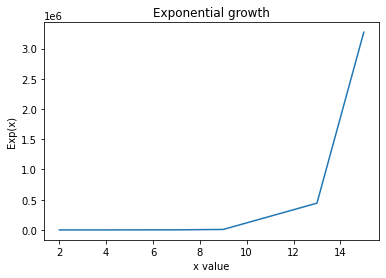

In [33]:
plt.plot(xValues,yValues)
plt.title('Exponential growth')
plt.xlabel('x value')
plt.ylabel('Exp(x)')
plt.savefig('expGrowth.png')

6. Import the dataset "DrugScreen1" (DrugScreen1.csv). Before importing, check which row of the .csv file contains the header.

In [34]:
drugs1=pd.read_csv("DrugScreen1.csv",header=2)

In [35]:
drugs1.head()

,ObjectID,Label,Centroid,MeanIntensity,StandardDeviationIntensity,MaxIntensity,MinIntensity,TotalIntensity,Area,Count,EquivalentDiskRadius,Elongation,Eccentricity,Circularity,BoundingBox
0,5,5,{448.72869022869025. 497.8035343035343},0.015626,0.000932,0.017960,0.013336,7.516197,484.625,481,12.373644,0.106691,0.449443,0.936560,{{435.. 485.}. {463.. 509.}}
1,6,6,{583.3871165644172. 490.18957055214725},0.011809,0.000431,0.012955,0.010651,9.624552,819.375,815,16.106600,0.101290,0.438544,0.941424,{{566.. 474.}. {600.. 506.}}
2,7,7,{186.3943661971831. 478.2588028169014},0.014047,0.000528,0.016129,0.012543,7.978439,571.750,568,13.446190,0.111789,0.459435,0.977536,{{174.. 464.}. {200.. 492.}}
3,8,8,{267.6122047244094. 475.48228346456693},0.014450,0.000837,0.016831,0.012512,7.340719,512.250,508,12.716187,0.544601,0.890287,0.798317,{{248.. 459.}. {282.. 487.}}
4,9,9,{535.6371841155235. 472.5667870036101},0.011999,0.000431,0.013062,0.010849,6.647578,556.875,554,13.279446,0.283091,0.697166,0.921684,{{524.. 457.}. {547.. 488.}}


7. Load the text from the file AliceInWonderland.txt and count the number of words.

In [47]:
with open('AliceInWonderland.txt','r') as fObj:
    for line in fObj:
        words=line.split(" ")
len(words)  

9646

In [48]:
words[0:10]

['I--DOWN',
 'THE',
 'RABBIT-HOLE',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired']

8. Get the number of files in the current working directory.

In [49]:
import os

In [51]:
os.getcwd()

'C:\\Users\\saf75nu\\Documents\\Lehre\\github_Teaching\\Teaching\\Python\\Part_7_Import_Export'

In [53]:
files=os.listdir()

In [54]:
len(files)

19

### <p style='color: orange'>medium</p>

9. Count the number of .txt files in the current working directory.

In [63]:
fileNames=os.listdir()

In [64]:
fileNames

['.ipynb_checkpoints',
 'AliceInWonderland.txt',
 'barplot.pdf',
 'barplot.png',
 'dataFrame.csv',
 'dictionary.txt',
 'dictionary_json.txt',
 'DrugScreen1.csv',
 'DrugScreen2.csv',
 'ex1_output.txt',
 'expGrowth.png',
 'file.txt',
 'lengthMeasure.csv',
 'lines.pdf',
 'lines.png',
 'Python3_Import_Export_with_solutions.ipynb',
 'results.txt',
 'test.txt',
 'Weights.csv']

In [66]:
fileCounter = 0
for name in fileNames:
    if ".txt" in name:
        fileCounter+=1

In [67]:
fileCounter

7

In [68]:
textFiles=[name for name in fileNames if ".txt" in name]

In [69]:
textFiles

['AliceInWonderland.txt',
 'dictionary.txt',
 'dictionary_json.txt',
 'ex1_output.txt',
 'file.txt',
 'results.txt',
 'test.txt']

In [70]:
len(textFiles)

7

In [58]:
fileCounter = 0
for root, dirs, files in os.walk(os.getcwd()):
    for file in files:    
        if file.endswith('.txt'):
            fileCounter += 1

In [61]:
fileCounter

7

10. Import the dataset drugScreen2 from the file DrugScreen2.csv. Check that the import worked correctly. If not, adjust the import parameters.

In [73]:
pd.read_csv("DrugScreen2.csv",header=2,sep=";")

,ObjectID,Label,Centroid,MeanIntensity,StandardDeviationIntensity,MaxIntensity,MinIntensity,TotalIntensity,Area,Count,EquivalentDiskRadius,Elongation,Eccentricity,Circularity,BoundingBox
0,7,7,{459.99136276391556. 492.37619961612285},0.019748,0.000691,0.021851,0.017304,20.577523,1047.250,1042,18.212054,0.231355,0.639675,0.942608,{{443.. 473.}. {480.. 511.}}
1,8,8,{582.0196540880503. 488.8545597484277},0.016742,0.000408,0.017960,0.015488,21.295979,1277.750,1272,20.121883,0.176285,0.567004,0.950213,{{563.. 467.}. {601.. 511.}}
2,10,10,{252.66795665634675. 468.062693498452},0.019027,0.000736,0.021500,0.016495,24.582284,1297.750,1292,20.279457,0.224331,0.631139,0.943473,{{233.. 446.}. {271.. 491.}}
3,11,11,{519.5494417862839. 471.28468899521533},0.017201,0.000409,0.018921,0.015732,21.569741,1259.875,1254,19.979004,0.088522,0.411348,0.933544,{{498.. 451.}. {540.. 492.}}
4,12,12,{190.21635777598712. 476.0809830781628},0.018559,0.000698,0.021988,0.016495,23.031647,1246.750,1241,19.875175,0.199912,0.599883,0.938563,{{170.. 454.}. {208.. 498.}}
5,13,13,{63.19469026548673. 443.1386430678466},0.016914,0.000769,0.019043,0.014984,11.467826,683.250,678,14.690613,0.453377,0.837379,0.892713,{{44.. 427.}. {80.. 457.}}
6,14,14,{308.729203539823. 440.0486725663717},0.017599,0.000484,0.019318,0.016220,19.886397,1134.500,1130,18.965499,0.167601,0.554176,0.910261,{{289.. 420.}. {328.. 459.}}
7,15,15,{383.8722126929674. 439.7984562607204},0.017647,0.000670,0.019486,0.015671,10.288289,586.500,583,13.622579,0.403134,0.802341,0.895345,{{366.. 428.}. {401.. 451.}}
8,17,17,{562.68756698821. 423.9801714898178},0.017485,0.000518,0.019013,0.015808,16.313252,938.250,933,17.233198,0.091011,0.416820,0.906885,{{545.. 405.}. {582.. 442.}}
9,18,18,{185.91501976284584. 419.90711462450594},0.019241,0.000581,0.021607,0.017594,19.472206,1017.500,1012,17.947969,0.101034,0.438019,0.937992,{{167.. 402.}. {206.. 438.}}


12. Import the dataset "Weights" (Weights.csv). Plot a histogram of the weights and export it as a PDF. 

In [83]:
weightsDF=pd.read_csv("Weights.csv",header=1)

In [84]:
weightsDF.head()

,Weights
0,105.108259
1,112.257397
2,72.988258
3,66.240478
4,84.025744


In [88]:
weightsList=weightsDF["Weights"].tolist()

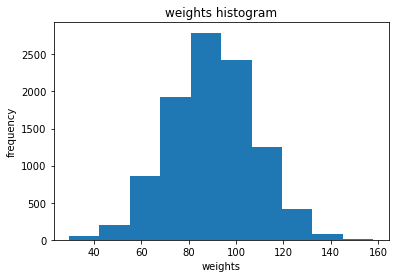

In [93]:
plt.hist(weightsList)
plt.title('weights histogram')
plt.xlabel('weights')
plt.ylabel('frequency')
plt.savefig('weightsHist.pdf')

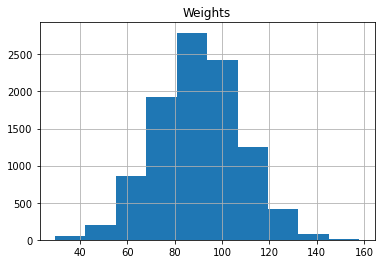

In [94]:
weightsDF.hist()
plt.savefig('weightsHistDF.pdf')

### <p style='color: red'>hard</p>

13. Write code for looking up translations in the dictionary `word`. A user should be prompted to input an English word. If it is one of the words in the dictionary, the German translation should be displayed on the screen. If the word is not contained in the dictionary a respective notice should be displayed on the screen.

In [96]:
words={}
fObj=open('dictionary.txt','r')
for line in fObj:
    lineParts=line.split(" ")
    words[lineParts[0]] = lineParts[1]
fObj.close()    

In [97]:
words

{'car': 'Auto\n',
 'bicycle': 'Fahrrad\n',
 'bottle': 'Flasche\n',
 'fan': 'Ventilator\n',
 'jacket': 'Jacke'}

In [115]:
wordQuestion=input("Please provide an English word")
if wordQuestion in list(words.keys()):
    print("The German translation is: ",words[wordQuestion])
else: print("Unfortunately, this word is not part of our dictionary.")

Please provide an English wordskirt
Unfortunately, this word is not part of our dictionary.


In [1]:
int('5.6')

ValueError: invalid literal for int() with base 10: '5.6'

In [7]:
int(float('5.6'))

5